## Aula 01

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
#Adicionando link do 
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

#adicionando a basea de dados em uma variável
dados = pd.read_csv(fonte)

#Exibindo as 5 linhas do DataFrame
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [146]:
# Exibindo a quantidade da base de dados
dados.shape

(127380, 136)

In [147]:
#Selecionando a coluna do estado de residencia
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [148]:
# Retornar somente o nome das colunas
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [149]:
# Selecionando algumas colunas
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [150]:
#Selecionar somente os estados
dados["SG_UF_RESIDENCIA"]

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [151]:
#identificar quais estados existem na lista
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [152]:
#identificnado a quantidade de estagos tem na lista (array)
len(dados["SG_UF_RESIDENCIA"].unique())

27

Devemos ter `atenção` na quantidade, pois, dependendo da amostra, pode ser que não seja condizente com a realidade 

In [153]:
# Contando quantas vezes o estado em UF Residencia
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [154]:
# Plotando a  quantidade de idades 
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [155]:
# descobrindo se tem pessoas com menos de 16 anos ou pessoas maiores de 76 anos
## Ordenando as idades pelo index
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

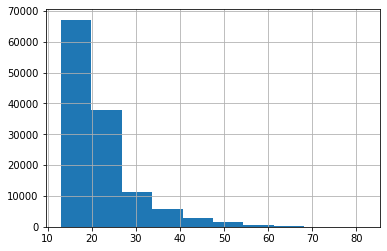

In [156]:
#Verificando um pouco mais da distribuição das idades
dados["NU_IDADE"].hist()

Nesse gráfico, é possível verificar que a maior parte das pessoas que estão prestando o ENEM de 2019 tem entre 13 e 20 anos proporcionalmente. 

Porém, há um problema na visualização desse gráfico. Por padrão, são 10  divididos de 10 em 10 as idades e, isso da a impressão que pessoas com 13 anos tem quase a mesma quantidade do que os participantes que estão entre 17 - 20 anos;

Para resolver isso, devemos aumentar a quantidade de "caixinhas" para melhorar a visualização do histograma

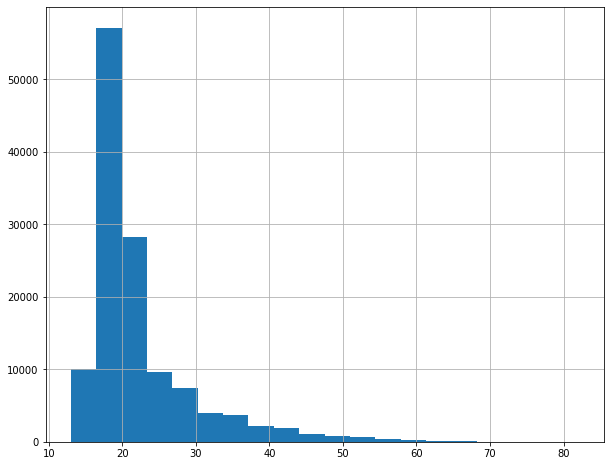

In [157]:
#Melhorando a distribuição das idades com a divisão de "caixinhas" por 20
#------------------------------------------------------------------------
# Melhorando o tamanho da figura
dados["NU_IDADE"].hist(bins = 20, figsize = (10, 8))

Agora, com a quantidade de mais "caixas", é possível ver que o histograma de uma forma mais verídica;

#### Verificando se os participantes de 13 anos são treineiros

In [158]:
# Recebendo somente os participantes que NÃO são treneiros
dados.query("IN_TREINEIRO != 1")["IN_TREINEIRO"]

1         0
2         0
3         0
5         0
6         0
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 111979, dtype: int64

In [159]:
# Recebendo somente os participantes que são treneiros
dados.query("IN_TREINEIRO == 1")["IN_TREINEIRO"]

0         1
4         1
12        1
14        1
16        1
         ..
127328    1
127340    1
127349    1
127350    1
127352    1
Name: IN_TREINEIRO, Length: 15401, dtype: int64

In [160]:
# Selecionando as idades das pessoas que são TREINEIROS
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts()

16    7142
17    4901
15    1927
18     858
19     228
20      83
14      64
21      44
22      30
23      21
24      13
26      13
29      10
27       9
25       8
28       6
38       4
40       4
31       4
30       4
42       4
34       3
36       2
39       2
32       2
46       2
44       2
35       2
45       1
41       1
33       1
62       1
48       1
51       1
37       1
47       1
55       1
Name: NU_IDADE, dtype: int64

É possível notar que as pessoas que mais fazem o ENEM como treineiro são as pessoas entre 16 e 17 anos, seguido pelos de 15 anos;

In [161]:
#Identificando pessoas que são de 13 anos e se realmente elas são treineiras
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

É possível verificar que `nessa amosta` as pessoas com 13 anos não estão participando do ENEM como treineiros

#### Notas

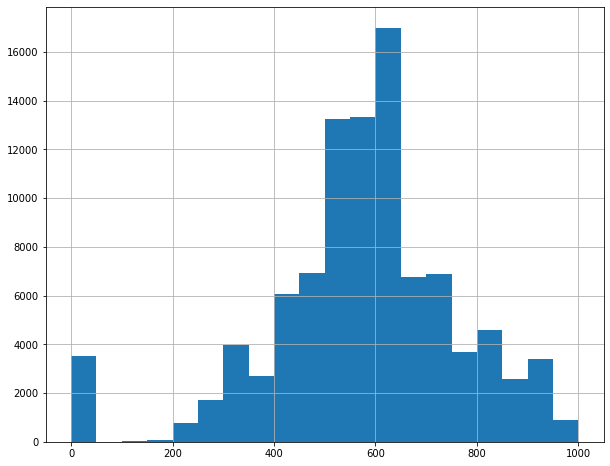

In [162]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize = (10, 8))

Nesse histograma com a nota redação, é possível verificar que forma uma curva "normal" (Forma de sino). Tirando a quantidade relativamente grande de `notas 0`

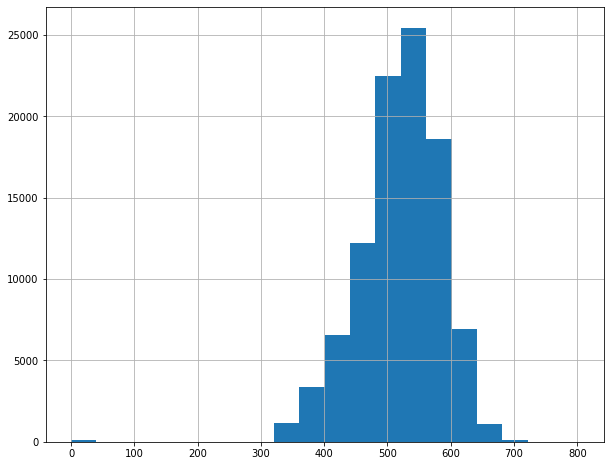

In [163]:
# realizando a plotagem de um histograma da matéria Linguaguens e Códigos
dados["NU_NOTA_LC"].hist(bins = 20, figsize = (10, 8))

In [164]:
# Calculando a média da nota de redação
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [165]:
# Calculando o desvio padrão da nota de redação 
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [166]:
#
# criando uma lista contendo as colunas das provas
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# Descrevendo estatiscamente as provas
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [167]:
# Quantidade em porcentagem das pessoas que tiraram nota mais alta
# que 582
dados["NU_NOTA_CN"].quantile(0.9)

582.2

*lembre-se*: 10% tirou nota maiorq ue 582.2 e 90% menor;


para analisar os 10% mais altos deve-se usar `0.9`. Caso queira analisar os 10% com a menor nota, deve utilizar `0.1`

#### Visualizando distribuição estatística utilizando boxplot

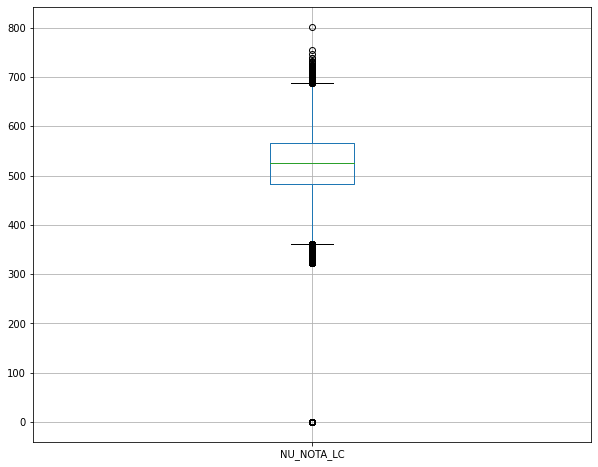

In [168]:
# plotando boxplot para visualização estatistica  
dados["NU_NOTA_LC"].plot.box(grid = True, figsize = (10, 8))

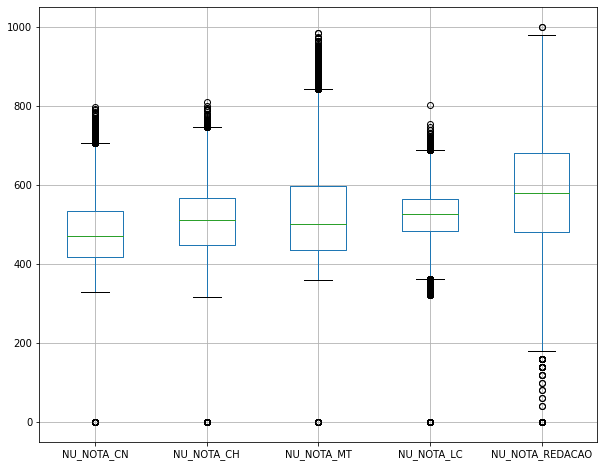

In [169]:
# criando um boxplot com todas as provas para comparação
dados[provas].plot.box(grid = True, figsize = (10, 8))

#Desafios
---
Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

## Desafio01: Proporção dos inscritos por idade.

In [170]:
idade = dados["NU_IDADE"]

idade


0         17
1         23
2         35
3         23
4         16
          ..
127375    17
127376    18
127377    22
127378    26
127379    19
Name: NU_IDADE, Length: 127380, dtype: int64

## Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

In [171]:
df_desafio02 = dados[["SG_UF_RESIDENCIA", "NU_IDADE"]]
df_desafio02.query("NU_IDADE == 13")

,SG_UF_RESIDENCIA,NU_IDADE
57359,SP,13
95630,MT,13
98197,AP,13
116501,BA,13


## Desafio03: Adicionar título no gráfico